# Import Google Drive

In [ ]:
#Problemi:
#1) non tutte le immagini hanno una valutazione (good, ok, bad, junk). Queste le ho scartate
#2) molte immagini di dimensione diversa
#3) trovate alcune immagini con label sbagliato

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
#!unzip "/content/drive/MyDrive/paris.zip" -d "/content/drive/MyDrive/Paris120x120/"  > /dev/null

# Carica i file di Ground Truth

In [222]:
import os

good = set();
ok = set();
bad = set();
junk = set();

#groundtruth_dir = "/content/drive/My Drive/OxfordTxt/"
#groundtruth_dir = "/content/drive/My Drive/gzp/"
groundtruth_dir = r"C:\Users\dansp\OneDrive\Desktop\gdz"

#Itera i file txt nella directory
def leggi_ground_truth_files(directory):
  for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
      rank = filename.split("_")[-1] #la parte finale del nome del file
      if rank == "good.txt":
        leggi_file(f,good)
      elif rank == "ok.txt":
        leggi_file(f,ok)   
      elif rank == "bad.txt":
        leggi_file(f,bad)
      elif rank == "junk.txt":
        leggi_file(f,junk)
      #elif rank == "query.txt":
        #leggi_file(f,query)
  return;


def leggi_file(f, s):
  with open(f) as f:
    lines = f.readlines()
    for line in lines:
      #rimuovo il \n finale e aggiungo .jpg
      line = line[:len(line)-1] + ".jpg"
      s.add(line)
  return;

In [223]:
leggi_ground_truth_files(groundtruth_dir)
print("Numero di good: ", len(good))
print("Numero di ok: ", len(ok))
print("Numero di bad: ", len(bad))
print("Numero di junk: ", len(junk))

Numero di good:  0
Numero di ok:  1790
Numero di bad:  0
Numero di junk:  1619


# Carica DataSet

In [224]:
from PIL import Image
import numpy as np

class_names = ['paris_defense', 'paris_eiffel', 'paris_general', 'paris_invalides', 'paris_louvre', 'paris_moulinrouge',
                'paris_museedorsay', 'paris_notredame', 'paris_pantheon', 'paris_pompidou', 'paris_sacrecoeur', 'paris_triomphe' ]

#dataset_dir='/content/drive/My Drive/Paris120x120/'
dataset_dir = r"C:\Users\dansp\OneDrive\Desktop\paris"


In [225]:
#Carica il dataset scartando le foto che non hanno una valutazione o ne hanno
#più di una
def carica_dataset_da_directory(dataset_dir):
  #cicla nelle entry della directory
  for filename in os.listdir(dataset_dir):
    f = os.path.join(dataset_dir, filename)
    # checking if it is a file
    if os.path.isfile(f):
      valutazione = carica_valutazione(filename);
      label = carica_label(filename)
      carica_foto(f, dataset, valutazione, label)
  return;


def carica_foto(f, dataset, valutazione, label):
  if label == -1 or valutazione < 0:
    return #foto senza valutazione o senza label, scartata

  img = Image.open(f)
  pix = np.array(img)/255
  formati.add(pix.shape)
  dataset[label][valutazione].append(pix)
  return;


def carica_label(filename):
  for i in range(len(class_names)):
    if(filename.startswith(class_names[i])):
      return i
  return -1


def carica_valutazione(filename):
  flag = 0
  x = [0,0,0,0] #flag per presenza di filename in good, ok, bad e junk
  if filename in good:
    x[0]=1
  if filename in ok:
    x[1]=1
  if filename in bad:
    x[2]=1
  if filename in junk:
    x[3]=1

  if sum(x) > 1:
    #print(filename, ": valutazioni discordanti")
    return -1
  if sum(x) == 0:
    #print(filename, ": valutazione non disponibile")
    return -2

  for i in range(4):
    if x[i] == 1:
      return i #0:good, 1:ok, 2:bad, 3:junk
  return 0;


#dataset[landmark][valutazione] = foto
dataset = [ [[],[],[],[]] for x in range(len(class_names))] 
formati = set()

carica_dataset_da_directory(dataset_dir)

In [226]:
from re import I
#FUNZIONI PER LA STAMPA DI STATISTICHE SUL DB
def dataset_len(dataset):
  n = 0
  for i in range(len(dataset)):
    for j in range(len(dataset[i])):
      n = n + len(dataset[i][j])
  return n;

def immagini_nei_landmark(dataset):
  v = np.zeros(len(dataset))
  for i in range(len(dataset)):
    for j in range(len(dataset[i])):
      v[i] = v[i] + len(dataset[i][j])
  return v;

def valutazioni_landmarks(dataset):
  v = [ [0,0,0,0] for x in range(len(dataset))]
  for i in range(len(dataset)):
    for j in range(len(dataset[i])):
      v[i][j] = len(dataset[i][j])
  return v;

def good_ok_bad_junk(dataset):
  x = valutazioni_landmarks(dataset)
  v = [0,0,0,0]
  for i in range(len(x)):
    for j in range(len(x[i])):
      v[j] = v[j] + x[i][j]
  return v

print("Numero immagini del dataset: ", dataset_len(dataset))
print("Numero di immagini nei vari landmark: ", immagini_nei_landmark(dataset))
print("Per ogni landmark, quanti sono quelli good, ok, bad e junk: ", valutazioni_landmarks(dataset))
print("Immagini good-ok-bad-junk: ", good_ok_bad_junk(dataset))
print("Numero di formati:", len(formati), formati)

Numero immagini del dataset:  3389
Numero di immagini nei vari landmark:  [232. 129. 683. 266. 249. 345.  90. 205. 319. 147. 280. 444.]
Per ogni landmark, quanti sono quelli good, ok, bad e junk:  [[0, 124, 0, 108], [0, 61, 0, 68], [0, 268, 0, 415], [0, 182, 0, 84], [0, 131, 0, 118], [0, 237, 0, 108], [0, 72, 0, 18], [0, 113, 0, 92], [0, 127, 0, 192], [0, 52, 0, 95], [0, 145, 0, 135], [0, 268, 0, 176]]
Immagini good-ok-bad-junk:  [0, 1780, 0, 1609]
Numero di formati: 1 {(120, 120, 3)}


# Split dei dati in training, validation, test set

In [227]:
# per avere uno split equilibrato, esso avverrà secondo il seguente criterio:
# il training set sarà formato, per ogni landmark, dall' 80% del totale delle
# good per quel landmark + 80% del totale delle ok per quel landmark + ecc...
# il test set e il validation set avranno il 10% a testa

def split_dataset(dataset, x_train, x_val, x_test):

  for i in range(len(dataset)):
    for j in range(len(dataset[i])): 
      
      num_samples = len(dataset[i][j])

      train_len = round(0.8 * num_samples)
      x_train[i][j] = x_train[i][j] + dataset[i][j][:train_len]
      
      val_len = (num_samples - train_len) // 2
      x_val[i][j] = x_val[i][j] + dataset[i][j][train_len: train_len + val_len]

      test_len = (num_samples - train_len - val_len)
      x_test[i][j] = x_test[i][j] + dataset[i][j][-test_len:]

  return;

x_train = [ [[],[],[],[]] for x in range(len(class_names))]
x_val = [ [[],[],[],[]] for x in range(len(class_names))]
x_test = [ [[],[],[],[]] for x in range(len(class_names))]

split_dataset(dataset, x_train, x_val, x_test)

print(dataset_len(x_train))
print(dataset_len(x_val))
print(dataset_len(x_test))

2711
334
344


# Data Augmentation

Training set examples


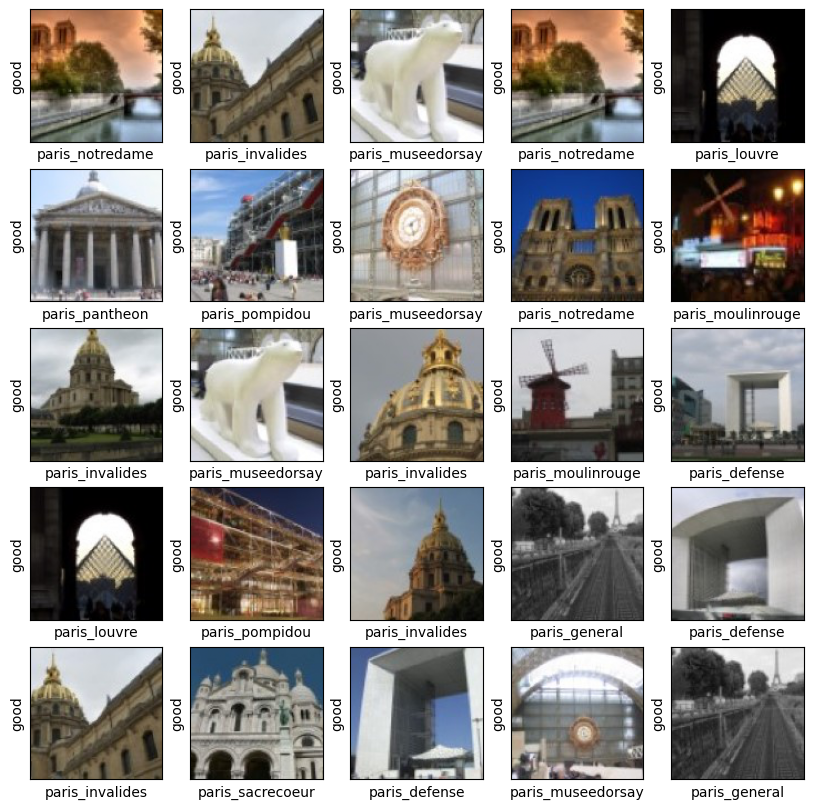

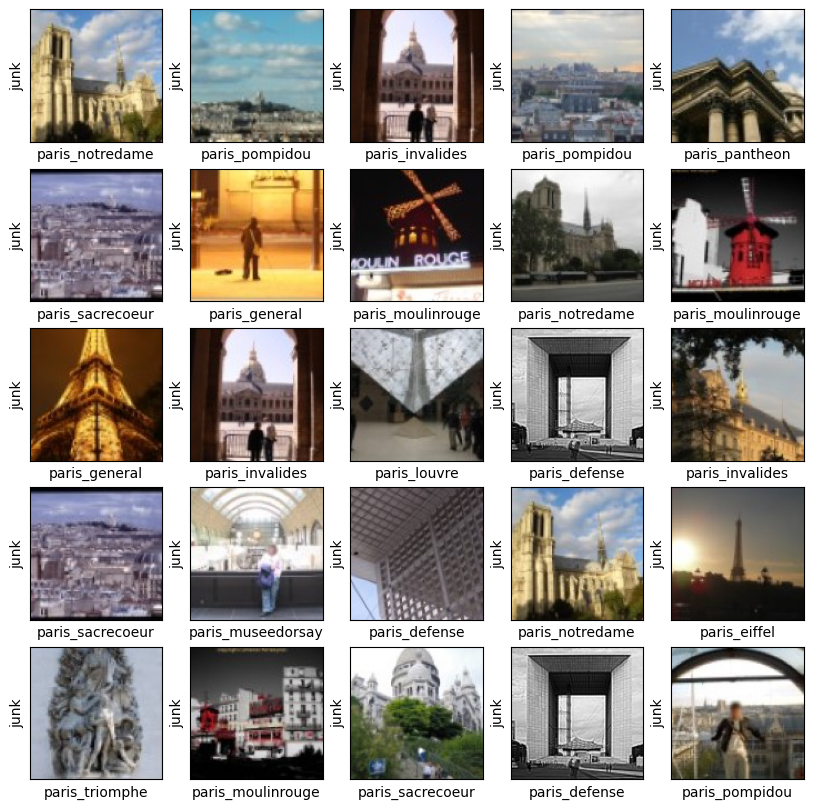

In [228]:
import matplotlib.pyplot as plt
import random

def stampa_esempi(val):
  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(dataset[i], cmap=plt.cm.binary)
    landmark = random.randint(0, len(x_train)-1)
    index = random.randint(0, len(x_train[landmark])-1)
    plt.imshow(x_train[landmark][val][index], cmap=plt.cm.binary)
    plt.xlabel(class_names[landmark])
    if val == 1:
      plt.ylabel("good")
    if val == 3:
      plt.ylabel("junk")
  plt.show()
  return;

#Stampa esempi good
print("Training set examples")
stampa_esempi(1)
print("")
stampa_esempi(3)



In [49]:
#eventuali trasformazioni


#Creazione di Coppie

In [9]:
def make_pairs(x):
    """Crea coppie di immagini con label di corrispondenza

    Arguments:
        x è una lista avente la seguente struttura:
          - x[landmark][valutazione][immagine]

    Returns:
        Tuple containing two numpy arrays as (pairs_of_samples, labels),
        where pairs_of_samples' shape is (2len(x), 2,n_features_dims) and
        labels are a binary array of shape (2len(x)).
    """
    pairs = []
    labels = []

    num_classes = len(class_names)

    for i in range(len(x)):
      for j in range(len(x[i])):
        if j == 3:
          continue #salto i junk, non ha senso considerarli come buoni per le coppie
        for z in range(len(x[i][j])):

          # add a matching example
          label1 = i
          x1 = x[i][j][z]
          x2 = random.choice(x[i][1])

          pairs += [[x1, x2]]
          labels += [0]


          # add a non-matching example
          label2 = random.randint(0, num_classes - 1)
          while label2 == label1:
            label2 = random.randint(0, num_classes - 1)
          x2 = random.choice(x[label2][random.choice([1,3])])

          pairs += [[x1, x2]]
          labels += [1]
          
    return np.array(pairs), np.array(labels).astype("float32")

In [10]:
# make train, validation and test pairs
pairs_train, labels_train = make_pairs(x_train)
pairs_val, labels_val = make_pairs(x_val)
pairs_test, labels_test = make_pairs(x_test)

print(len(pairs_train), len(labels_train))
print(len(pairs_val), len(labels_val))
print(len(pairs_test), len(labels_test))

2850 2850
350 350
360 360


# Creazione Triplet

In [51]:
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input

def make_triplet(x, preprocess=True):
   #triplets = []
    anchors =[]
    positives=[]
    negatives =[]
    num_classes = len(class_names)

    for i in range(len(x)):
      for j in range(len(x[i])):
        if j == 3:
          continue #salto i junk, non ha senso considerarli come buoni per le coppie
        for z in range(len(x[i][j])):

          # x2 is matching example
          label1 = i
          x1 = x[i][j][z]
          x2 = random.choice(x[i][1])

          # x3 is non-matching example
          label2 = random.randint(0, num_classes - 1)
          while label2 == label1:
            label2 = random.randint(0, num_classes - 1)
          x3 = random.choice(x[label2][random.choice([1,3])])

          #triplets += [[x1, x2, x3]]
          #if preprocess:
          #  x1=preprocess_input(x1)
          #  x2=preprocess_input(x2)
          #  x3=preprocess_input(x3)
          anchors += [x1]
          positives+= [x2]
          negatives+= [x3]

    anchor_dataset = tf.data.Dataset.from_tensor_slices(anchors)
    positive_dataset = tf.data.Dataset.from_tensor_slices(positives)
    negative_dataset = tf.data.Dataset.from_tensor_slices(negatives) 

    return  tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))

In [52]:
# make train, validation and test triplet
triplet_train = make_triplet(x_train)
triplet_val = make_triplet(x_val)
triplet_test = make_triplet(x_test)

triplet_train = triplet_train.batch(32, drop_remainder=False)
triplet_train = triplet_train.prefetch(8)

triplet_val = triplet_val.batch(32, drop_remainder=False)
triplet_val = triplet_val.prefetch(8)


print(len(triplet_train))
print(len(triplet_val))
print(len(triplet_test))

45
6
180


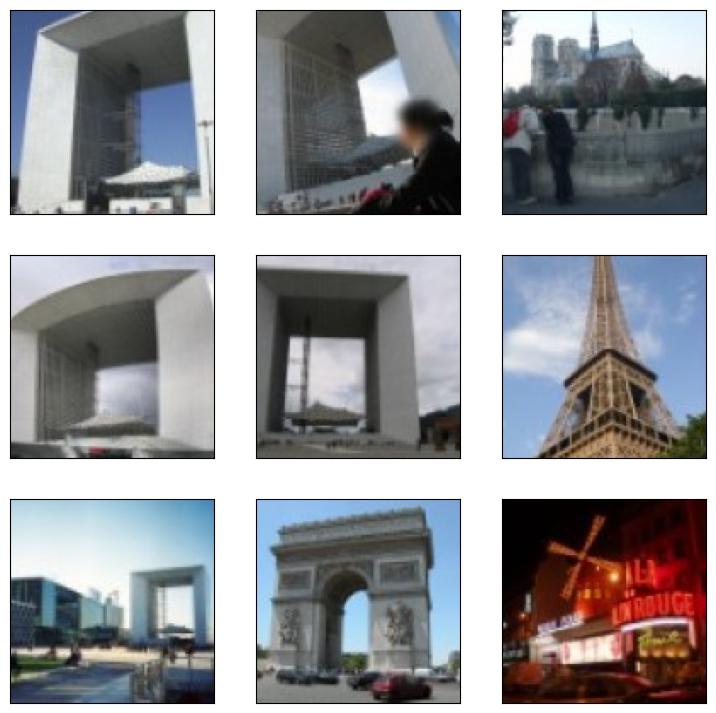

In [278]:

def visualize(an,pos,neg):
    """Visualize a few triplets from the supplied batches."""

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))

    axs = fig.subplots(3, 3)
    for i in range(3):
        show(axs[i, 0], an[i])
        show(axs[i, 1], pos[i])
        show(axs[i, 2], neg[i])

visualize(*list(triplet_train.take(1).as_numpy_iterator())[0])

# Definizione del modello (Binario) (PROVVISORIO)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


# Provided two tensors t1 and t2
# Euclidean distance = sqrt(sum(square(t1-t2)))
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))


input = layers.Input((120, 120, 3))
x = tf.keras.layers.BatchNormalization()(input)
x = layers.Conv2D(4, (5, 5), activation="tanh")(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
x = layers.AveragePooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)

x = tf.keras.layers.BatchNormalization()(x)
x = layers.Dense(10, activation="tanh")(x)
embedding_network = keras.Model(input, x)


input_1 = layers.Input((120, 120, 3))
input_2 = layers.Input((120, 120, 3))

# As mentioned above, Siamese Network share weights between
# tower networks (sister networks). To allow this, we will use
# same embedding network for both tower networks.
tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])
normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)
output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)
siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)



In [ ]:
def loss(margin=1):
    """Provides 'constrastive_loss' an enclosing scope with variable 'margin'.

    Arguments:
        margin: Integer, defines the baseline for distance for which pairs
                should be classified as dissimilar. - (default is 1).

    Returns:
        'constrastive_loss' function with data ('margin') attached.
    """

    # Contrastive loss = mean( (1-true_value) * square(prediction) +
    #                         true_value * square( max(margin-prediction, 0) ))
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss


In [ ]:
epochs = 10
batch_size = 16
margin = 1  # Margin for constrastive loss.

siamese.compile(loss=loss(margin=margin), optimizer="RMSprop", metrics=["accuracy"])
siamese.summary()

print(pairs_train.shape)

x_train_1 = pairs_train[:, 0]  # x_train_1.shape is (60000, 28, 28)
x_train_2 = pairs_train[:, 1]

x_val_1 = pairs_val[:, 0]  # x_val_1.shape = (60000, 28, 28)
x_val_2 = pairs_val[:, 1]


print(x_train_1.shape)
print(x_train_2.shape)



In [ ]:
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    validation_data=([x_val_1, x_val_2], labels_val),
    batch_size=batch_size,
    epochs=epochs,
)


In [ ]:
def plt_metric(history, metric, title, has_valid=True):
    """Plots the given 'metric' from 'history'.

    Arguments:
        history: history attribute of History object returned from Model.fit.
        metric: Metric to plot, a string value present as key in 'history'.
        title: A string to be used as title of plot.
        has_valid: Boolean, true if valid data was passed to Model.fit else false.

    Returns:
        None.
    """
    plt.plot(history[metric])
    if has_valid:
        plt.plot(history["val_" + metric])
        plt.legend(["train", "validation"], loc="upper left")
    plt.title(title)
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.show()


# Plot the accuracy
plt_metric(history=history.history, metric="accuracy", title="Model accuracy")

# Plot the constrastive loss
plt_metric(history=history.history, metric="loss", title="Constrastive Loss")


# Definizione Modello Triple

In [54]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import resnet
from tensorflow.keras.applications.resnet import preprocess_input

In [127]:
def get_encoder (input_shape):
    
    base_cnn = resnet.ResNet50(
    weights="imagenet", input_shape=input_shape, include_top=False)
    
    trainable = False
    for layer in base_cnn.layers:
        if layer.name == "conv5_block1_out":
            trainable = True
        layer.trainable = trainable
        
    encode_model = tf.keras.models.Sequential([
        base_cnn,
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(256, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(32)
    ], name="Embedding")
    
    
    return encode_model

In [128]:
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)

def get_siamese_network (input_shape = (120,120,3)):
    embedding_model = get_encoder(input_shape)
    input_anchor = tf.keras.layers.Input(shape= target_shape)
    input_positive = tf.keras.layers.Input(shape= target_shape)
    input_negative = tf.keras.layers.Input(shape= target_shape)
    
    embedding_anchor = embedding_model(resnet.preprocess_input(input_anchor))
    embedding_positive = embedding_model(resnet.preprocess_input(input_positive))
    embedding_negative = embedding_model(resnet.preprocess_input(input_negative))

    #embedding_anchor = embedding_model(input_anchor)
    #embedding_positive = embedding_model(input_positive)
    #embedding_negative = embedding_model(input_negative)

    distances = DistanceLayer()(
    embedding_anchor ,
    embedding_positive,
    embedding_negative ,
    )

    siamese_network =  tf.keras.models.Model(
    inputs=[input_anchor, input_positive, input_negative], outputs=distances
    )
    return siamese_network
    
siamese_network = get_siamese_network()   

In [129]:
class SiameseModel(tf.keras.models.Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super().__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = tf.keras.metrics.Mean(name="loss")
        self.acc_tracker =tf.keras.metrics.BinaryAccuracy(name ="accuracy")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        
        with tf.GradientTape() as tape:
            loss,acc = self._compute_loss(data)
        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)
        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )
        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state((acc|True),acc)
        return {"loss": self.loss_tracker.result(),"acc": self.acc_tracker.result()}

    def test_step(self, data):
        
        loss,acc = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        self.acc_tracker.update_state((acc|True),acc)
        return {"loss": self.loss_tracker.result(),"acc": self.acc_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss, (ap_distance<an_distance)
    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker,self.acc_tracker]

In [130]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), weighted_metrics=[])
history = siamese_model.fit(triplet_train, epochs=10, validation_data=triplet_val)

Epoch 1/10
45/45 [==============================] - 70s 1s/step - loss: 0.4358 - acc: 0.6080 - val_loss: 0.3784 - val_acc: 0.6514
Epoch 2/10
45/45 [==============================] - 58s 1s/step - loss: 0.3901 - acc: 0.6651 - val_loss: 0.3346 - val_acc: 0.7257
Epoch 3/10
45/45 [==============================] - 59s 1s/step - loss: 0.3603 - acc: 0.6895 - val_loss: 0.3529 - val_acc: 0.6629
Epoch 4/10
45/45 [==============================] - 58s 1s/step - loss: 0.3144 - acc: 0.7294 - val_loss: 0.3266 - val_acc: 0.7314
Epoch 5/10
45/45 [==============================] - 58s 1s/step - loss: 0.2872 - acc: 0.7476 - val_loss: 0.2954 - val_acc: 0.7314
Epoch 6/10
45/45 [==============================] - 59s 1s/step - loss: 0.2473 - acc: 0.7903 - val_loss: 0.3238 - val_acc: 0.7029
Epoch 7/10
45/45 [==============================] - 58s 1s/step - loss: 0.2282 - acc: 0.8110 - val_loss: 0.3075 - val_acc: 0.7143
Epoch 8/10
45/45 [==============================] - 58s 1s/step - loss: 0.1973 - acc: 0.83

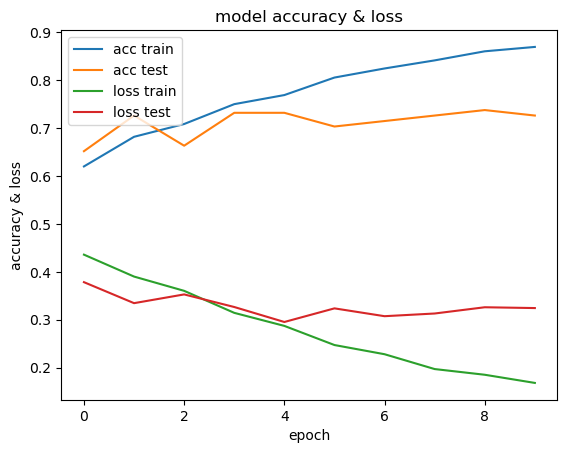

In [131]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy & loss')
plt.xlabel('epoch')
plt.legend(['acc train', 'acc test', 'loss train','loss test'], loc='upper left')
plt.show()

# Usare il modello allenato

In [140]:
def exctract_embedding(model):
    encoder=get_encoder((120,120,3))
    i=0
    for e_layer in model.layers[0].layers[9].layers:
        layer_weight= e_layer.get_weights()
        encoder.layers[i].set_weights(layer_weight)
        i+=1
    return encoder
encoder=exctract_embedding(siamese_model)
encoder.save_weights("encoder")
encoder.summary()

Model: "Embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_17 (Flatten)        (None, 32768)             0         
                                                                 
 dense_51 (Dense)            (None, 512)               16777728  
                                                                 
 batch_normalization_34 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_52 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_35 (Bat  (None, 256)              1024      
 chNormalization)                                        

### Data un immagine in ingresso, trovare quale immagine appartenente al training set sia la più vicina, e classificare l'immagine in base al graound truth dell'immagine più simile

In [275]:
def classify_images(train,toFind,threshold=1.3):
    tensor1=encoder.predict(train)
    tensor2=encoder(tf.reshape(toFind,(1,120,120,3)))
    distance =np.sum(np.square(tensor1-tensor2),axis=-1)
    return distance

In [ ]:
accuracy=0
tot=0
for name in range(len(class_names)):
    tot += len(x_test[name][1])
    for toTest in x_test[name][1]:
        min_dist=9999
        min_index=0
        min_photo=0
        for index in range(len(class_names)):
            arr=x_train[index][1] # [i] indica la classe [j] indica la qualita [k] la foto singola
            arr.extend(x_train[0][0]) #creo dataset di una sola classe con immagini solo good e ok
            dt=tf.data.Dataset.from_tensors(arr)
            distances=classify_images(dt,toTest)
            if(min(distances)<min_dist):
                min_dist=min(distances)
                min_index=index
                min_photo=distances.argmin()      
        if min_index == name:
            accuracy+=1
 
print(tot)

1/1 [==============================] - 2s 2s/step


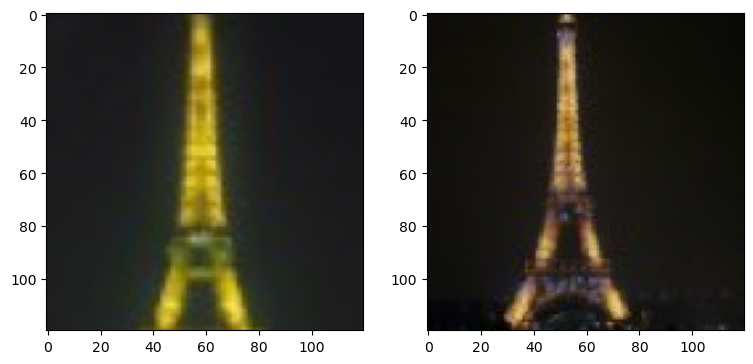

In [292]:
fig = plt.figure(figsize=(9, 9))
axs = fig.subplots(1, 2)

axs[0].imshow(toTest)
axs[1].imshow(x_train[min_index][1][min_photo])

In [200]:
from tensorflow.keras.utils import plot_model
plot_model(siamese_network, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [177]:
len(dataset[0][3])

108